In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('netflix_titles.csv', sep=',', encoding='iso-8859-1')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.shape

(8807, 12)

In [5]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
df01 = df.fillna('Não especificado')
df01.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [7]:
df01.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Não especificado,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Não especificado,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Não especificado,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [8]:
df01['country'].value_counts().to_frame()

,country
United States,2818
India,972
Não especificado,831
United Kingdom,419
Japan,245
...,...
"Romania, Bulgaria, Hungary",1
"Uruguay, Guatemala",1
"France, Senegal, Belgium",1
"Mexico, United States, Spain, Colombia",1


In [9]:
df01['country'].value_counts().sum()

8807

In [10]:
df01['country'].nunique()

749

In [11]:
df01.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Não especificado,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."


In [12]:
df01 = df01.rename(columns={'type':'Tipo', 'title': 'Título', 'director': 'Diretor', 'cast':'Elenco', 'country':'País', 'date_added':'Data de adicionamento', 'release_year':'Ano de Lançamento', 'rating':'Avaliação', 'duration':'Duração', 'listed_in':'Categoria', 'description':'Descrição'})

In [13]:
df02 = df01.drop(columns=['show_id', 'Elenco',])

In [14]:
df02.head()

,Tipo,Título,Diretor,País,Data de adicionamento,Ano de Lançamento,Avaliação,Duração,Categoria,Descrição
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,Não especificado,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,Não especificado,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,Não especificado,Não especificado,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,Não especificado,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [15]:
filmesBrasileiros = df02.loc[df02.País == 'Brazil']

In [16]:
filmesBrasileiros

,Tipo,Título,Diretor,País,Data de adicionamento,Ano de Lançamento,Avaliação,Duração,Categoria,Descrição
302,Movie,City of God: 10 Years Later,"Cavi Borges, Luciano Vidigal",Brazil,"August 5, 2021",2013,TV-MA,69 min,"Documentaries, International Movies","A decade after the seminal Brazilian film ""Cit..."
650,Movie,O Vendedor de Sonhos,Jayme Monjardim,Brazil,"June 22, 2021",2016,TV-14,96 min,"Dramas, International Movies",A disillusioned psychologist tries to commit s...
783,Movie,Carnaval,Leandro Neri,Brazil,"June 2, 2021",2021,TV-MA,95 min,"Comedies, International Movies, Music & Musicals","After a breakup, an influencer takes her frien..."
966,Movie,Get the Grift,Pedro Antonio,Brazil,"April 28, 2021",2021,TV-MA,95 min,"Comedies, International Movies","After a botched scam, ClÃ³vis bumps into Lohan..."
1188,Movie,Get the Goat,Vitor Brandt,Brazil,"March 18, 2021",2021,TV-14,98 min,"Action & Adventure, Comedies, International Mo...",Two hapless cops find themselves in over their...
...,...,...,...,...,...,...,...,...,...,...
7818,Movie,Radical: the Controversial Saga of Dada Figuei...,Raphael Erichsen,Brazil,"April 12, 2017",2013,TV-MA,71 min,"Documentaries, International Movies, Sports Mo...",This film chronicles the career of surfer DadÃ...
8108,Movie,Stronger Than the World,Afonso Poyart,Brazil,"February 11, 2017",2016,NR,123 min,"Action & Adventure, Dramas, International Movies","After a tough upbringing, natural-born fighter..."
8207,TV Show,The Beginning of Life: The Series,Estela Renner,Brazil,"November 11, 2016",2016,TV-PG,1 Season,"Docuseries, International TV Shows, Science & ...",Using breakthroughs in technology and neurosci...
8300,Movie,The First Temptation of Christ,Rodrigo Van Der Put,Brazil,"December 3, 2019",2019,TV-MA,46 min,"Comedies, International Movies","Jesus, who's hitting the big 3-0, brings a sur..."


In [17]:
filmesBrasileiros['Avaliação'].value_counts()

TV-MA    50
TV-14    10
TV-PG     6
TV-G      3
TV-Y      3
PG        2
NR        2
PG-13     1
Name: Avaliação, dtype: int64

In [18]:
filmesBrasileiros['Ano de Lançamento'].value_counts()

2020    20
2019    17
2018    13
2017     9
2016     6
2021     4
2013     3
2015     3
2012     1
2014     1
Name: Ano de Lançamento, dtype: int64

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

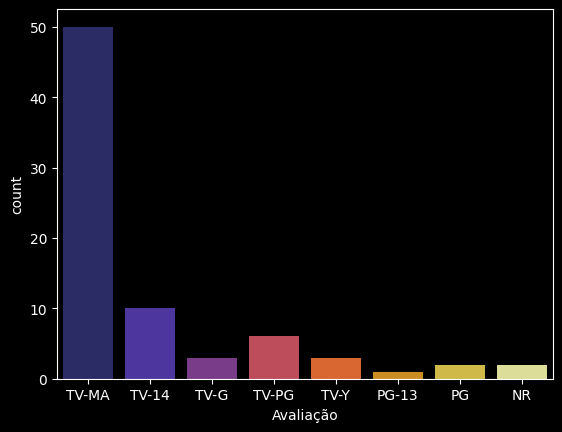

In [20]:
sns.countplot(data=filmesBrasileiros,x="Avaliação",palette='CMRmap')
plt.show()

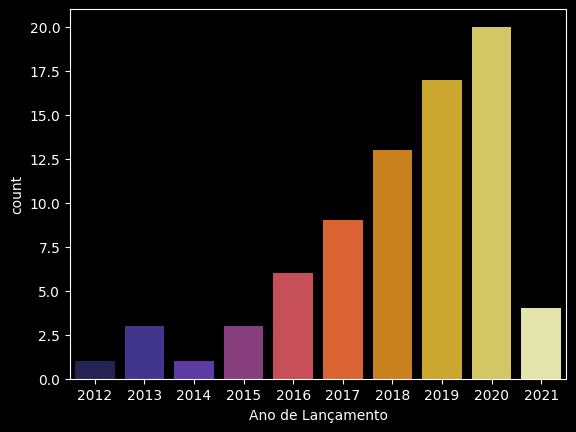

In [21]:
sns.countplot(data=filmesBrasileiros,x="Ano de Lançamento",palette='CMRmap')
plt.show()